# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 3 - Exploratory Data Analysis</div>
### <div align="center"> 28 September 2021 </div>

<div align="center"> Fabien Forge, (he/him)</div>

# Today

- This will be our last class entirely dedicated to coding
- In class 1 we learned about some of the basics of Python
- In class 2 we spent time getting familiar with the Numpy and Pandas library
- Today we will keep using Pandas and other tools such as [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) for data visualization

# Exploratory Data Analysis

- What is exploratory data analysis?
- This is usually the last step before the actual analysis (e.g. running regressions)
- This is an opportunity to explore variables: 
    - alone or as they relate to one another
    - using statistics or data visualization

# Dataset
- Today we will use a dataset from the [Village Dynamics Studies in South Asia](http://vdsa.icrisat.ac.in/)
- This dataset contains information of agricultural yields and prices for several crops at the district level in India for a number of years
- This is what's called panel data or longitudinal survey
- We will use a modified version of this dataset
- Let's explore this data together!

In [74]:
# import our packages and use aliases
import numpy as np
import pandas as pd

# In class exercise
- The dataset is named "vdsa"
- It is a Stata file (ending with _.dta_ extension)
- Name the folder in which the dataset is class3Folder
- use the Pandas dataframe function .read_stata() to open the dataset
- Assign it to df

In [75]:
# Assign path to the folder containing the dataset
class3Folder="/Users/forgef/Dropbox/Data Science for Social Scientists/Fall 2021/Lectures/Class 3 - Data Visualization/"
# read in the data using the read_stata() function and assign it to df
df= pd.read_stata(class3Folder+"vdsa.dta")

What should I do now?

In [76]:
# show number of observations and columns
display(df.shape)
#show information on the number of missing values and data type
display(df.info())
# describe the dataframe
display(df.describe().T)
# read head of dataframe
display(df.head())

(6531, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6530
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   statename          6531 non-null   object 
 1   distname           6531 non-null   object 
 2   statecode          6531 non-null   int32  
 3   distcode           6531 non-null   int32  
 4   year               6531 non-null   int32  
 5   yield_maize        6531 non-null   float32
 6   yield_pearlmillet  6531 non-null   float32
 7   yield_rice         6531 non-null   float32
 8   yield_sorghum      6531 non-null   float32
 9   yield_wheat        6531 non-null   float32
 10  price_maize        6531 non-null   object 
 11  price_pearlmillet  6531 non-null   object 
 12  price_rice         6531 non-null   object 
 13  price_sorghum      6531 non-null   object 
 14  price_wheat        6531 non-null   object 
 15  area_maize         6531 non-null   float32
 16  area_pearlmillet   6531 

None

,count,mean,std,min,25%,50%,75%,max
statecode,6531.0,9.575563,4.989752,1.0,6.000,10.000000,12.000000,20.000000
distcode,6531.0,270.504823,278.933573,1.0,78.000,156.000000,242.000000,917.000000
year,6531.0,2005.000000,6.055764,1995.0,2000.000,2005.000000,2010.000000,2015.000000
yield_maize,6531.0,1.677863,1.511377,-1.0,1.000,1.529876,2.309656,11.119659
yield_pearlmillet,6531.0,0.233669,1.089716,-1.0,-1.000,0.500000,1.055647,5.000000
yield_rice,6531.0,1.703875,1.208094,-1.0,1.000,1.800846,2.475094,6.547089
yield_sorghum,6531.0,0.336373,0.992529,-1.0,-1.000,0.638889,1.000000,5.743452
yield_wheat,6531.0,1.657178,1.468041,-1.0,1.000,1.750000,2.646766,5.541539
area_maize,6531.0,22.732262,39.594200,-1.0,0.565,6.070000,26.000000,295.000000
area_pearlmillet,6531.0,29.061031,86.598175,-1.0,0.000,0.150000,10.420000,1020.179993


,statename,distname,statecode,distcode,year,yield_maize,yield_pearlmillet,yield_rice,yield_sorghum,yield_wheat,price_maize,price_pearlmillet,price_rice,price_sorghum,price_wheat,area_maize,area_pearlmillet,area_rice,area_sorghum,area_wheat
0,Andhra Pradesh,Ananthapur,1,52,1995,3.500000,0.750000,2.170732,0.750000,-1.000000,,R 4253.0,R 6831.8184,,,2.00,4.00,41.00,32.000000,0.00
1,Andhra Pradesh,Ananthapur,1,52,1996,4.333333,0.666667,2.470588,0.810811,-1.000000,R 3930.0,R 4843.0,R 6866.6665,R 4749.0,,3.00,3.00,68.00,37.000000,0.00
2,Andhra Pradesh,Ananthapur,1,52,1997,1.750000,1.000000,2.074074,0.724138,-1.000000,R 4046.0,R 4913.0,R 7325.758,R 4920.0,,4.00,1.00,54.00,29.000000,0.00
3,Andhra Pradesh,Ananthapur,1,52,1998,3.000000,0.666667,2.476923,1.473684,-1.000000,R 4380.0,R 7500.0,,R 5240.0,R 4620.0,3.00,3.00,65.00,19.000000,0.00
4,Andhra Pradesh,Ananthapur,1,52,1999,3.081365,0.543353,2.587983,1.384427,0.659091,R 4547.0,R 5250.0,R 9318.182,R 6905.0,R 5330.0,3.81,1.73,58.25,32.619999,0.44


# Data cleaning
- Before exploring the data further we need to make some data cleaning
- Using info() indicates that none of our data has missing values
    - Clearly there are empty cells when calling head() on df
    - Does negative values for yield or area mean something?
- Also, it seems that prices are stored as strings when clearly they should be numerical

 # Dealing with NaNs
- You may remember that last week we replaced missing values (nan) by zeros
     - this is because we had reasons to believe that missing values meant no test that day
- In this dataset this is probably different:
    - Yields and areas could be missing because the specific crop wasn't grown in the district in that year
    - Yields and areas existed but wasn't recorded
- It turns out in this dataset, missing values were recording as negative 1 (this is bad practice) 

## replace()
- We can use the [replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method to replace -1 by nan
- Because none of the variables could plausibly be negative we can apply replace to the entire dataframe not a single series

In [77]:
# use replace method on the entire dataframe and reassign to df
df=df.replace(-1,np.nan)
# show head()
df.head()

,statename,distname,statecode,distcode,year,yield_maize,yield_pearlmillet,yield_rice,yield_sorghum,yield_wheat,price_maize,price_pearlmillet,price_rice,price_sorghum,price_wheat,area_maize,area_pearlmillet,area_rice,area_sorghum,area_wheat
0,Andhra Pradesh,Ananthapur,1,52,1995,3.500000,0.750000,2.170732,0.750000,NaN,,R 4253.0,R 6831.8184,,,2.00,4.00,41.00,32.000000,0.00
1,Andhra Pradesh,Ananthapur,1,52,1996,4.333333,0.666667,2.470588,0.810811,NaN,R 3930.0,R 4843.0,R 6866.6665,R 4749.0,,3.00,3.00,68.00,37.000000,0.00
2,Andhra Pradesh,Ananthapur,1,52,1997,1.750000,1.000000,2.074074,0.724138,NaN,R 4046.0,R 4913.0,R 7325.758,R 4920.0,,4.00,1.00,54.00,29.000000,0.00
3,Andhra Pradesh,Ananthapur,1,52,1998,3.000000,0.666667,2.476923,1.473684,NaN,R 4380.0,R 7500.0,,R 5240.0,R 4620.0,3.00,3.00,65.00,19.000000,0.00
4,Andhra Pradesh,Ananthapur,1,52,1999,3.081365,0.543353,2.587983,1.384427,0.659091,R 4547.0,R 5250.0,R 9318.182,R 6905.0,R 5330.0,3.81,1.73,58.25,32.619999,0.44


# replace() & to_numeric()
- It also seems that the price columns are preceeded by the currency unit "R" (roopie)
- Let's remove it from the values using the [replace()]() method
- When applied to an object column the replace method should be preceeded by [str](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html)
- Then we can change the column type to numeric using [to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas.to_numeric) function

In [78]:
# remove "R" from the price_maize series
display(df['price_maize'].str.replace("R ",""))
# combine it with to_numeric()
pd.to_numeric(df['price_maize'].str.replace("R ",""))

0             
1       3930.0
2       4046.0
3       4380.0
4       4547.0
         ...  
6526          
6527          
6528          
6529          
6530          
Name: price_maize, Length: 6531, dtype: object

0          NaN
1       3930.0
2       4046.0
3       4380.0
4       4547.0
         ...  
6526       NaN
6527       NaN
6528       NaN
6529       NaN
6530       NaN
Name: price_maize, Length: 6531, dtype: float64

# In class exercise
For each column starting with price:
- remove R in all the price columns
- cast the data type to numeric
- replace the existing column with by the numeric representation

In [79]:
# create a list of columns starting with price_ using list comprehension
cols = [col for col in df if col.startswith('price')]
# print the head of columns starting with price
display(df[cols].head())
# loop over the column list
for col in cols:
    # replace the values 
    df[col]= pd.to_numeric(df[col].str.replace("R ",""))
    
# print head() of the data frame
df.head()

,price_maize,price_pearlmillet,price_rice,price_sorghum,price_wheat
0,,R 4253.0,R 6831.8184,,
1,R 3930.0,R 4843.0,R 6866.6665,R 4749.0,
2,R 4046.0,R 4913.0,R 7325.758,R 4920.0,
3,R 4380.0,R 7500.0,,R 5240.0,R 4620.0
4,R 4547.0,R 5250.0,R 9318.182,R 6905.0,R 5330.0


,statename,distname,statecode,distcode,year,yield_maize,yield_pearlmillet,yield_rice,yield_sorghum,yield_wheat,price_maize,price_pearlmillet,price_rice,price_sorghum,price_wheat,area_maize,area_pearlmillet,area_rice,area_sorghum,area_wheat
0,Andhra Pradesh,Ananthapur,1,52,1995,3.500000,0.750000,2.170732,0.750000,NaN,NaN,4253.0,6831.8184,NaN,NaN,2.00,4.00,41.00,32.000000,0.00
1,Andhra Pradesh,Ananthapur,1,52,1996,4.333333,0.666667,2.470588,0.810811,NaN,3930.0,4843.0,6866.6665,4749.0,NaN,3.00,3.00,68.00,37.000000,0.00
2,Andhra Pradesh,Ananthapur,1,52,1997,1.750000,1.000000,2.074074,0.724138,NaN,4046.0,4913.0,7325.7580,4920.0,NaN,4.00,1.00,54.00,29.000000,0.00
3,Andhra Pradesh,Ananthapur,1,52,1998,3.000000,0.666667,2.476923,1.473684,NaN,4380.0,7500.0,NaN,5240.0,4620.0,3.00,3.00,65.00,19.000000,0.00
4,Andhra Pradesh,Ananthapur,1,52,1999,3.081365,0.543353,2.587983,1.384427,0.659091,4547.0,5250.0,9318.1820,6905.0,5330.0,3.81,1.73,58.25,32.619999,0.44


Now that prices are numeric we can call again the describe() method

In [80]:
# call describe() on df
df.describe().round(1).transpose()

,count,mean,std,min,25%,50%,75%,max
statecode,6531.0,9.6,5.0,1.0,6.0,10.0,12.0,20.0
distcode,6531.0,270.5,278.9,1.0,78.0,156.0,242.0,917.0
year,6531.0,2005.0,6.1,1995.0,2000.0,2005.0,2010.0,2015.0
yield_maize,5868.0,2.0,1.3,0.0,1.1,1.7,2.4,11.1
yield_pearlmillet,3968.0,1.0,0.6,0.0,0.6,1.0,1.4,5.0
yield_rice,6010.0,1.9,0.9,0.0,1.2,1.9,2.5,6.5
yield_sorghum,4522.0,0.9,0.5,0.0,0.6,0.9,1.1,5.7
yield_wheat,5530.0,2.1,1.0,0.0,1.3,2.0,2.8,5.5
price_maize,3701.0,7353.6,3690.8,200.0,4590.0,5940.0,9630.0,42000.0
price_pearlmillet,2585.0,7220.1,3952.7,2594.0,4500.0,5720.0,9010.0,35260.0


# groupby()
- It may be good to know about the number of unique districts
- One way to do this would be to combine groupby() with first() and then check the length

In [81]:
# Get info on the variables
display(df.groupby(['statecode','distcode']).first())
num_district=len(df.groupby(['statecode','distcode']).first())
print(f"There are {num_district} districts in this dataset")

statename       distname  year  yield_maize  \
statecode distcode                                                     
1         44        Andhra Pradesh     Srikakulam  1995     3.000000   
          45        Andhra Pradesh  Visakhapatnam  1995     1.941176   
          46        Andhra Pradesh  East Godavari  1995     2.600000   
          47        Andhra Pradesh  West Godavari  1995     3.200000   
          48        Andhra Pradesh        Krishna  1995     2.500000   
...                            ...            ...   ...          ...   
20        59             Telangana       Nalgonda  1995     2.000000   
          60             Telangana       Warangal  1995     2.393939   
          61             Telangana        Khammam  1995     3.000000   
          62             Telangana     Karimnagar  1995     3.302325   
          63             Telangana       Adilabad  1995     2.285714   

                    yield_pearlmillet  yield_rice  yield_sorghum  yield_wheat  \
statecode distcode                                                              
1         44                 1.307692    1.996552       0.000000          NaN   
          45                 0.970149    2.000000       0.857143          NaN   
          46                 0.600000    2.727273       1.000000          NaN   
          47                 1.250000    2.685897       1.000000          NaN   
          48                 1.000000    2.690217       0.000000          NaN   
...                               ...         ...            ...          ...   
20        59                 0.318182    2.612245       0.416667          NaN   
          60                 0.000000    2.367647       0.520000     0.666667   
          61                 0.000000    2.356589       0.566667          NaN   
          62                 0.000000    2.666667       0.666667     0.687500   
          63                 0.593750    1.185714       0.740113     0.750000   

                    price_maize  price_pearlmillet  price_rice  price_sorghum  \
statecode distcode                                                              
1         44             3930.0             3778.0   5490.9090         4990.0   
          45             3930.0             4260.0   5977.2730         4990.0   
          46             3930.0             3860.0   5878.7880         4990.0   
          47             3930.0             3860.0   5825.7580         4990.0   
          48             3930.0             3860.0   6348.4850         4990.0   
...                         ...                ...         ...            ...   
20        59             3930.0             3490.0   5696.9697         4990.0   
          60             3885.0             3860.0   6378.7880         4125.0   
          61             3730.0             3860.0   5918.1816         5100.0   
          62             3610.0             3610.0   6060.6060         4990.0   
          63             3410.0             3410.0   5939.3940         4655.0   

                    price_wheat  area_maize  area_pearlmillet  area_rice  \
statecode distcode                                                         
1         44                NaN         0.5               6.5      290.0   
          45                NaN         8.5              33.5      188.0   
          46                NaN         5.0               5.0      418.0   
          47                NaN         5.0               0.0      468.0   
          48                NaN         6.0               0.0      368.0   
...                         ...         ...               ...        ...   
20        59                NaN         2.0              22.0      196.0   
          60                NaN        33.0               1.0      136.0   
          61                NaN        19.0               0.0      129.0   
          62                NaN        86.0               1.0      192.0   
          63                NaN        28.0               0.0       

There are 311 districts in this dataset


# Data visualization
- Some dimensions of your data beyond min, max, average and SD are better understond when visualized
- We will now talk about data visualization
- Pandas integrates a visualization package named [Matplotlib](https://matplotlib.org/)
- Another useful package is [Seaborn](https://seaborn.pydata.org/)

In [82]:
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# In Class Exercise - plot()
- There are actually ways to plot directly from Pandas
- This is the [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method

<AxesSubplot:>

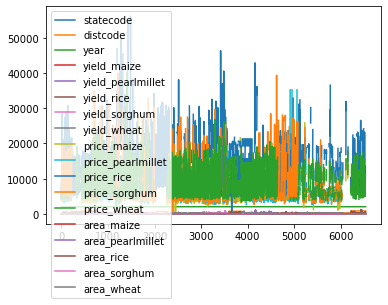

In [83]:
# Call the plot() method on the data frame
df.plot()

## pairplot() - Seaborn
Clearly this is not readable
Let's try the seaborn [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function

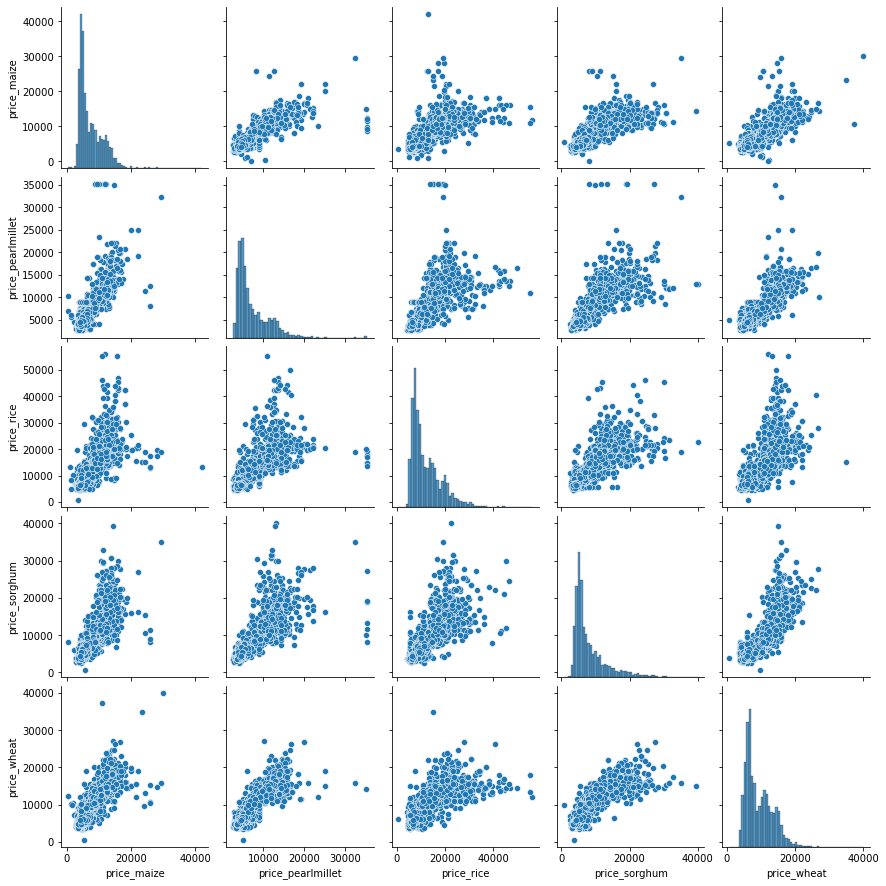

In [84]:
# use the pairplot function on the price columns
sns.pairplot(df[cols])

# Matplotlib's basics
- The pairplot is aestictically pleasing but things could be tuned
- You may want to replace the axes titles, the ticks, the colors etc.
- Let's see how to do this using Matplotlib

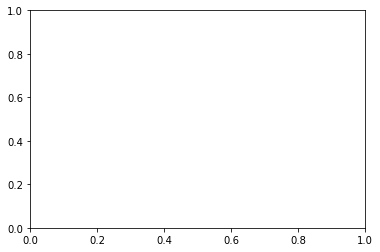

In [85]:
# Initialize figure and axes
fig, ax = plt.subplots()

plt.show()

# agg()
- Let's plot some data for the whole of India
- create a new dataframe named india where you group by year and take sum of yields
- To do this we will combine the [agg()](https://pandas.pydata.org/pandas-docs/version/0.23.2/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) method with groupby()

In [86]:
# yearly data on rice and wheat yields
india= df.groupby(['year']).agg(rice=('yield_rice','sum'),wheat=('yield_wheat','sum'))
india.reset_index(inplace=True)
india

,year,rice,wheat
0,1995,472.871307,502.507660
1,1996,508.091278,546.227905
2,1997,507.547821,485.615967
3,1998,515.732178,506.302002
4,1999,539.498962,536.710815
5,2000,500.242310,514.505005
6,2001,542.134399,549.633667
7,2002,456.596527,506.401764
8,2003,539.885742,534.705017
9,2004,525.424805,521.072327


- Let's now add the evolution of rice over the years
- You can add this by assigning it to ax

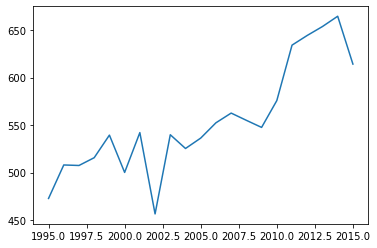

In [87]:
# Plot rice against year
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"])
plt.show()

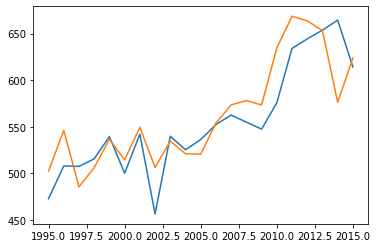

In [88]:
# Plot rice and wheat against year
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"])
ax.plot(india["year"], india["wheat"])
plt.show()

Let's improve on the presentation and use [markers](https://matplotlib.org/3.1.1/api/markers_api.html) for each data point, change the [line style](https://matplotlib.org/2.0.2/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle) and the [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

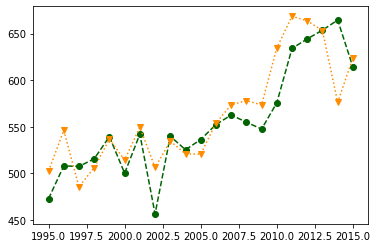

In [89]:
# Plot rice and wheat against year
# add a marker for each year
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen")
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange")
plt.show()

### Axis labels and title
- It is always a good idea to specify the label and the title of your axis
- You can call set_xlabel() and set_ylabel() on ax for labelling the axes
- You can use set_title() 

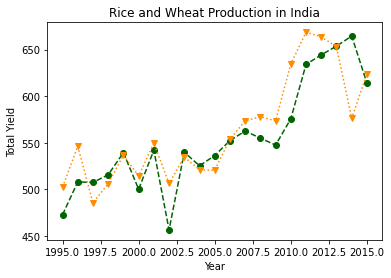

In [90]:
# Plot and add labels
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen")
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange")

#label axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Yield")

# title
ax.set_title("Rice and Wheat Production in India")


plt.show()

## legend 
- At this stage, it it impossible to know which line represents which crop
- You can specify the labels as an argument in plot()
- You then need to specify where in the plot you want the label to be positioned using [legend()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) on plt

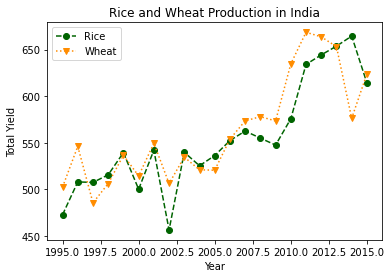

In [91]:
# Plot and add labels
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen",label='Rice')
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange",label='Wheat')

#label axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Yield")

# title
ax.set_title("Rice and Wheat Production in India")
# place the legend
plt.legend(loc="upper left")

plt.show()

### ticks

- On the x-label ticks should clearly be integers let's make one tick per year

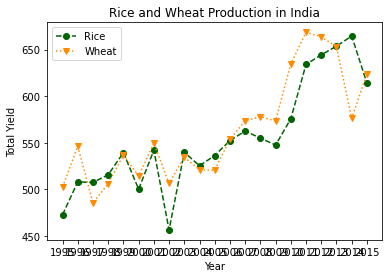

In [92]:
# Plot and add labels
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen",label='Rice')
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange",label='Wheat')

#label axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Yield")

# title
ax.set_title("Rice and Wheat Production in India")
# place the legend
plt.legend(loc="upper left")

# Redefine the ticks
plt.xticks(np.arange(india['year'].min(), india['year'].max()+1, 1))

plt.show()





### ticks continued
- This is clearly too crowded
- We could rotate the ticks
- Or take large steps

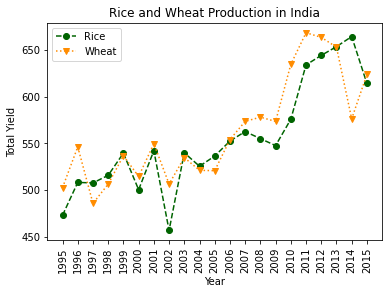

In [93]:
# Plot and add labels
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen",label='Rice')
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange",label='Wheat')

#label axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Yield")

# title
ax.set_title("Rice and Wheat Production in India")
# place the legend
plt.legend(loc="upper left")

# Redefine the ticks and rotate
plt.xticks(np.arange(india['year'].min(), india['year'].max()+1, 1), rotation='vertical')

plt.show()


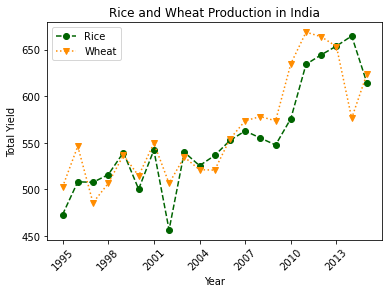

In [94]:
# Plot and add labels
fig, ax = plt.subplots()
ax.plot(india["year"], india["rice"], marker='o', linestyle="--", color="darkgreen",label='Rice')
ax.plot(india["year"], india["wheat"], marker='v', linestyle=":", color="darkorange",label='Wheat')

#label axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Yield")

# title
ax.set_title("Rice and Wheat Production in India")
# place the legend
plt.legend(loc="upper left")

# Redefine the ticks and rotate
plt.xticks(np.arange(india['year'].min(), india['year'].max()+1, 3), rotation=45)

plt.show()


# In Class Exercise - Plotting more data
Let's see how the quantity produced change with prices

- Create a new dataframe: india_prices
- It should record the average price of rice, wheat and sorghum each year for India using the agg() method again

In [95]:
india_prices= df.groupby(['year']).agg(Price=('price_rice','mean'),Pwheat=('price_wheat','mean'),Psorghum=('price_sorghum','mean'))
india_prices.reset_index(inplace=True)
india_prices

,year,Price,Pwheat,Psorghum
0,1995,7247.158196,4653.505263,4331.116438
1,1996,7476.392967,5565.559140,4770.321637
2,1997,7216.992324,5659.826291,4667.605556
3,1998,7930.621117,6049.720930,5133.661972
4,1999,8257.435864,6552.009346,5780.978417
5,2000,8001.687535,6668.437788,5557.432624
6,2001,7897.912063,6841.617225,5208.157895
7,2002,8341.156871,6963.928994,5481.259740
8,2003,8558.925163,6984.252941,5533.129252
9,2004,9154.669825,7097.685000,5737.410256


## merge()
- Let's use india and india_prices together
- To do so we will use the merge() method
- And save it in india_full

In [96]:
# merge india and india_prices and assign to india_full
india_full=india.merge(india_prices, on='year')
india_full.head()

,year,rice,wheat,Price,Pwheat,Psorghum
0,1995,472.871307,502.507660,7247.158196,4653.505263,4331.116438
1,1996,508.091278,546.227905,7476.392967,5565.559140,4770.321637
2,1997,507.547821,485.615967,7216.992324,5659.826291,4667.605556
3,1998,515.732178,506.302002,7930.621117,6049.720930,5133.661972
4,1999,539.498962,536.710815,8257.435864,6552.009346,5780.978417


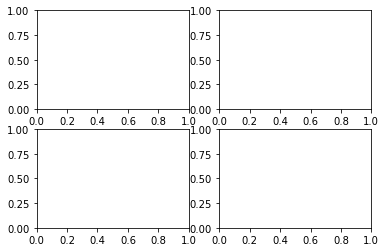

In [97]:
# initialize a 2x2 plot
fig, axes = plt.subplots(2,2)


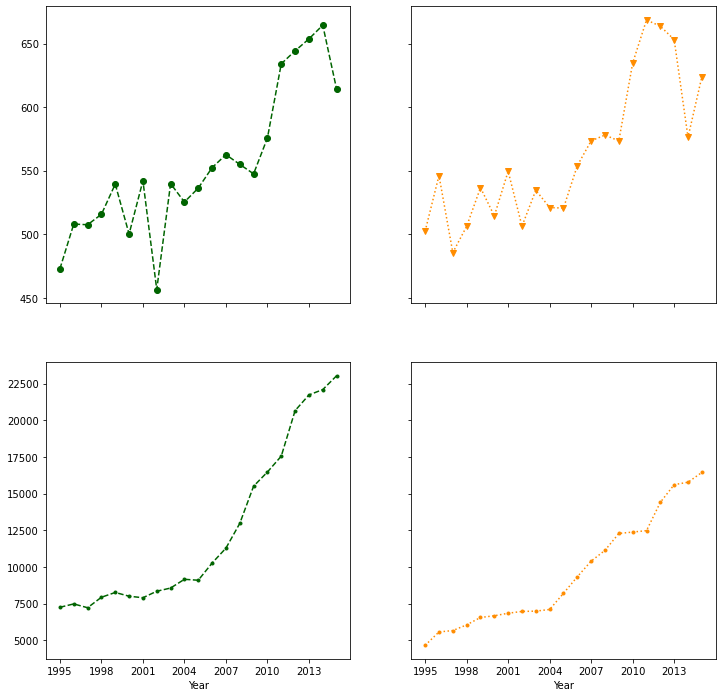

In [98]:
fig, axes = plt.subplots(2,2,sharex=True, sharey='row', figsize=(12, 12))
axes[0,0].plot(india_full["year"], india_full["rice"], marker='o', linestyle="--", color="darkgreen",label='Rice')
axes[0,1].plot(india_full["year"], india_full["wheat"], marker='v', linestyle=":", color="darkorange",label='Wheat')
axes[1,0].plot(india_full["year"], india_full["Price"], marker='.', linestyle="--", color="darkgreen",label='Rice')
axes[1,1].plot(india_full["year"], india_full["Pwheat"], marker='.', linestyle=":", color="darkorange",label='Wheat')

axes[1,0].set_xlabel("Year")
axes[1,1].set_xlabel("Year")

axes[1,0].set_xticks(np.arange(india_full['year'].min(), india_full['year'].max()+1, 3))
axes[1,1].set_xticks(np.arange(india_full['year'].min(), india_full['year'].max()+1, 3))


plt.show()

# Scatter plot


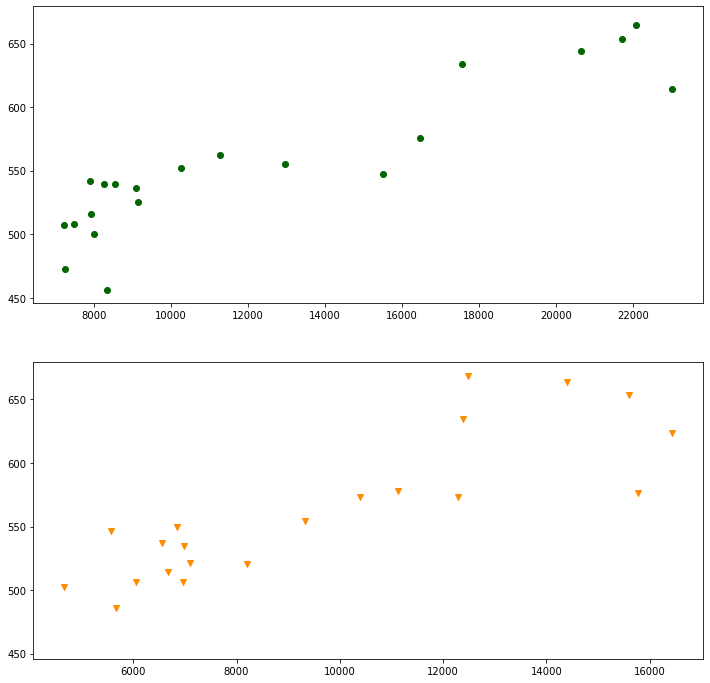

In [99]:
fig, axes = plt.subplots(2,1,sharex=False, sharey=True, figsize=(12, 12))
axes[0].scatter(india_full["Price"], india_full["rice"], marker='o', color="darkgreen",label='Rice')
axes[1].scatter(india_full["Pwheat"], india_full["wheat"], marker='v', color="darkorange" ,label='Wheat')



plt.show()

# Distribution of a single variable

- Often you will want to get a sense of the distribution of a single variable
- If you are interested in Bayesian statistics this is a must
- Let's look at the distribution of rice and wheat in our dataset
- A distribution represents - Cumulative distribution gives you prob$(x= X)$

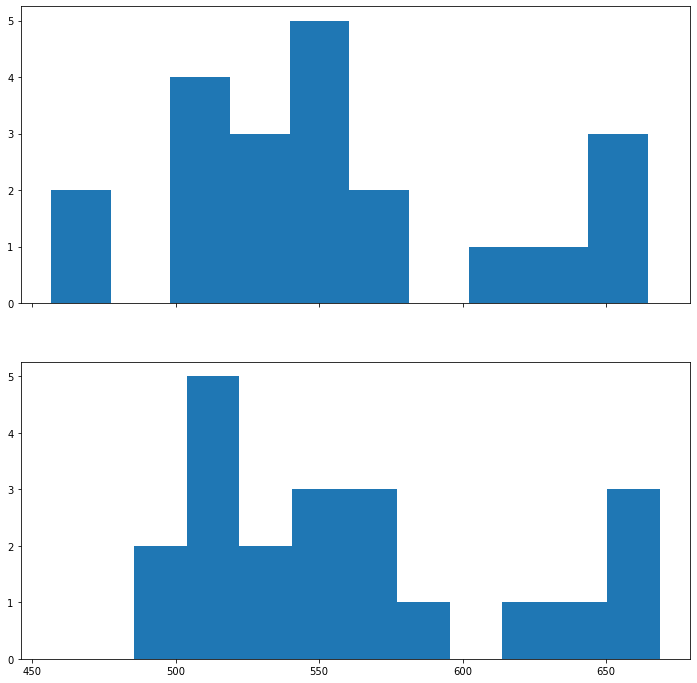

In [100]:
fig, axes = plt.subplots(2,1,sharex=True, sharey=True, figsize=(12, 12))
axes[0].hist(india['rice'])
axes[1].hist(india['wheat'])
plt.show()

This is not a density function (look at the y-axis)
Let's set the argument density to True

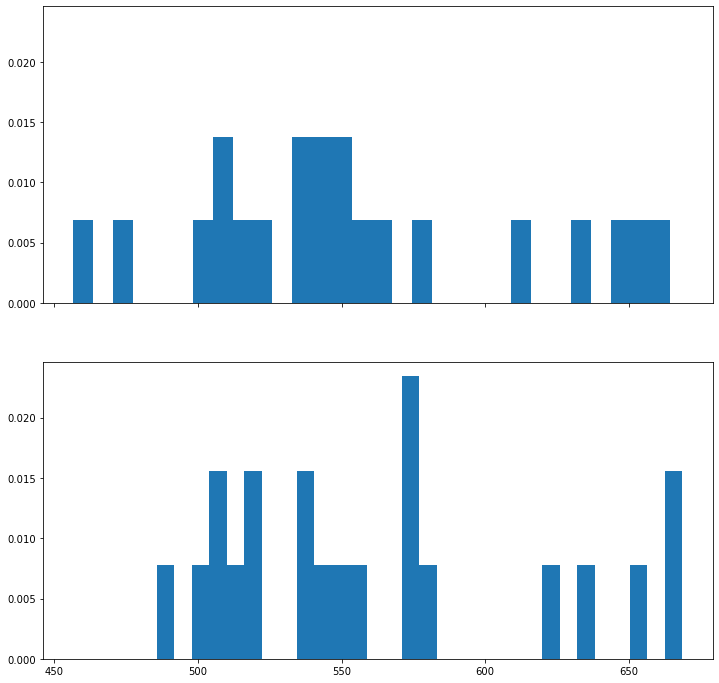

In [101]:
fig, axes = plt.subplots(2,1,sharex=True, sharey=True, figsize=(12, 12))
axes[0].hist(india['rice'],bins=30,density=True)
axes[1].hist(india['wheat'],bins=30,density=True)
plt.show()

## Cumulative distribution
- Cumulative distribution gives you prob$(x\leq X)$

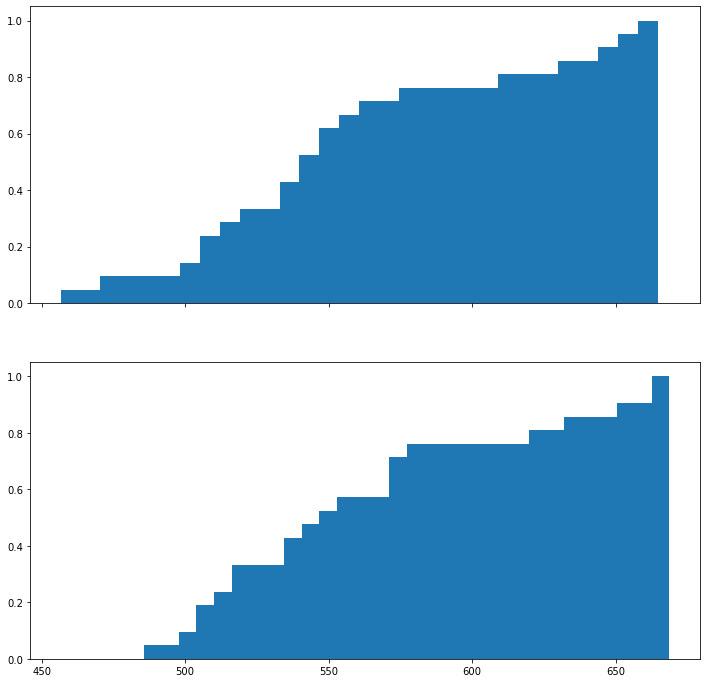

In [102]:
fig, axes = plt.subplots(2,1,sharex=True, sharey=True, figsize=(12, 12))
axes[0].hist(india['rice'],bins=30,density=True,cumulative=True)
axes[1].hist(india['wheat'],bins=30,density=True,cumulative=True)
plt.show()

## Making sense of distributions
- So these distributions give us a sense of how widespread the data is
- In our original data there are two sources of variation:
    - Cross sectional: some districts are more productive than others in any given year
    - Inter temporal: some years are more productive than others on average
    
Let's now look at rice in different years for the 2000 decade

In [103]:
# Subset india to the 2000 decade
india_2000=df.query("2000<=year<2010")
# store the unique values for years and the number of years in the dataset
years=india_2000['year'].unique()
num_years=len(years)
print(f"There are {num_years} years in the dataset.")

There are 10 years in the dataset.


- We can now plot for each year separately
- The variation will thus capture across districts variations within each year

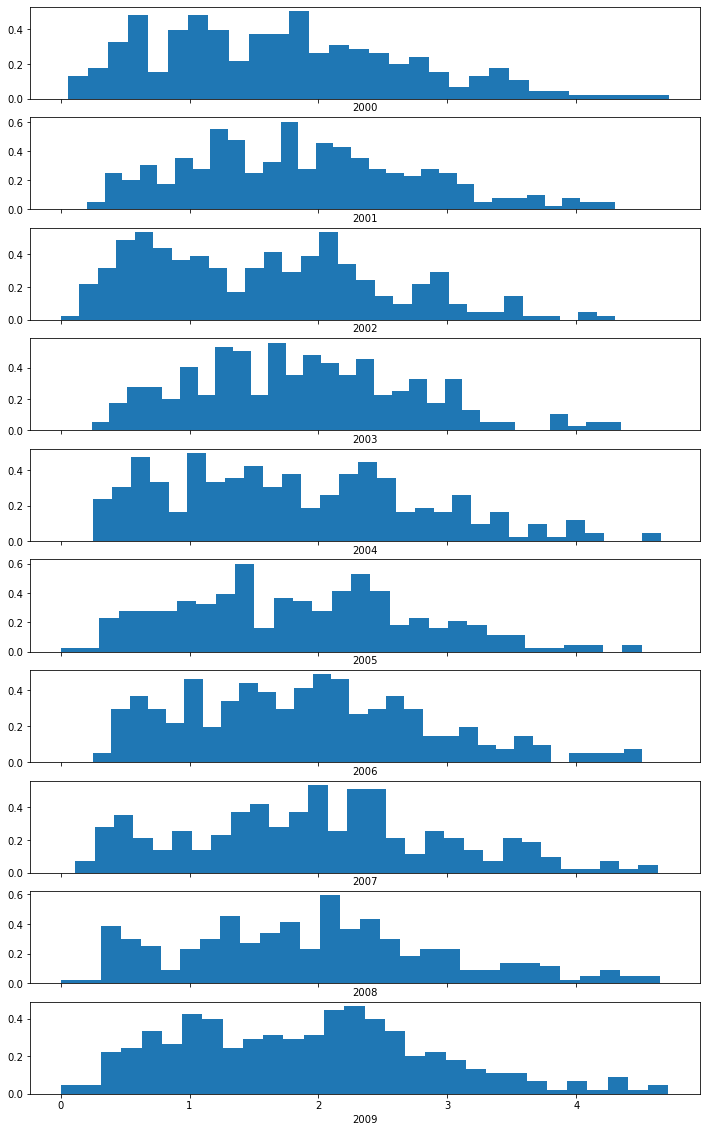

In [104]:
fig, axes = plt.subplots(num_years,1,sharex=True, sharey=False, figsize=(12, 20))

for i,y in enumerate(np.sort(years)):
    axes[i].hist(india_2000.loc[india_2000.year==y, 'yield_rice'],bins=30, density=True)
    axes[i].set_xlabel(f"{y}")

plt.show()

Let's now look at how the distribution varies by State
- We will first need to aggregate by state and year
- We will then plot a distribution for each State
- This will capture the variation across years within each State separately

In [105]:
# Create new dataframe india_state grouped by year and state with the sum of yield rice and the first value of statename
india_state=df.query("2000<=year<2010").groupby(['year','statecode']).agg(rice=('yield_rice','sum'), State=('statename','first')).reset_index()
display(india_state.head())

# store the unique values for States and the number of States in the dataset
states=india_state['State'].unique()
num_states=len(states)
print(f"There are {num_states} states in the dataset.")

,year,statecode,rice,State
0,2000,1,30.941221,Andhra Pradesh
1,2000,2,15.543173,Bihar
2,2000,3,11.874796,Gujarat
3,2000,4,17.787794,Haryana
4,2000,5,45.853806,Karnataka


There are 20 states in the dataset.


## In class exercise
Plot the distribution of rice for each state separately
- use a for loop in which you enumerate over the unique values of states
- label the x-axis with the name of the State in all caps
- make sure that the x-axis is shared by all plots
- figsize should be the tuple (12,30)

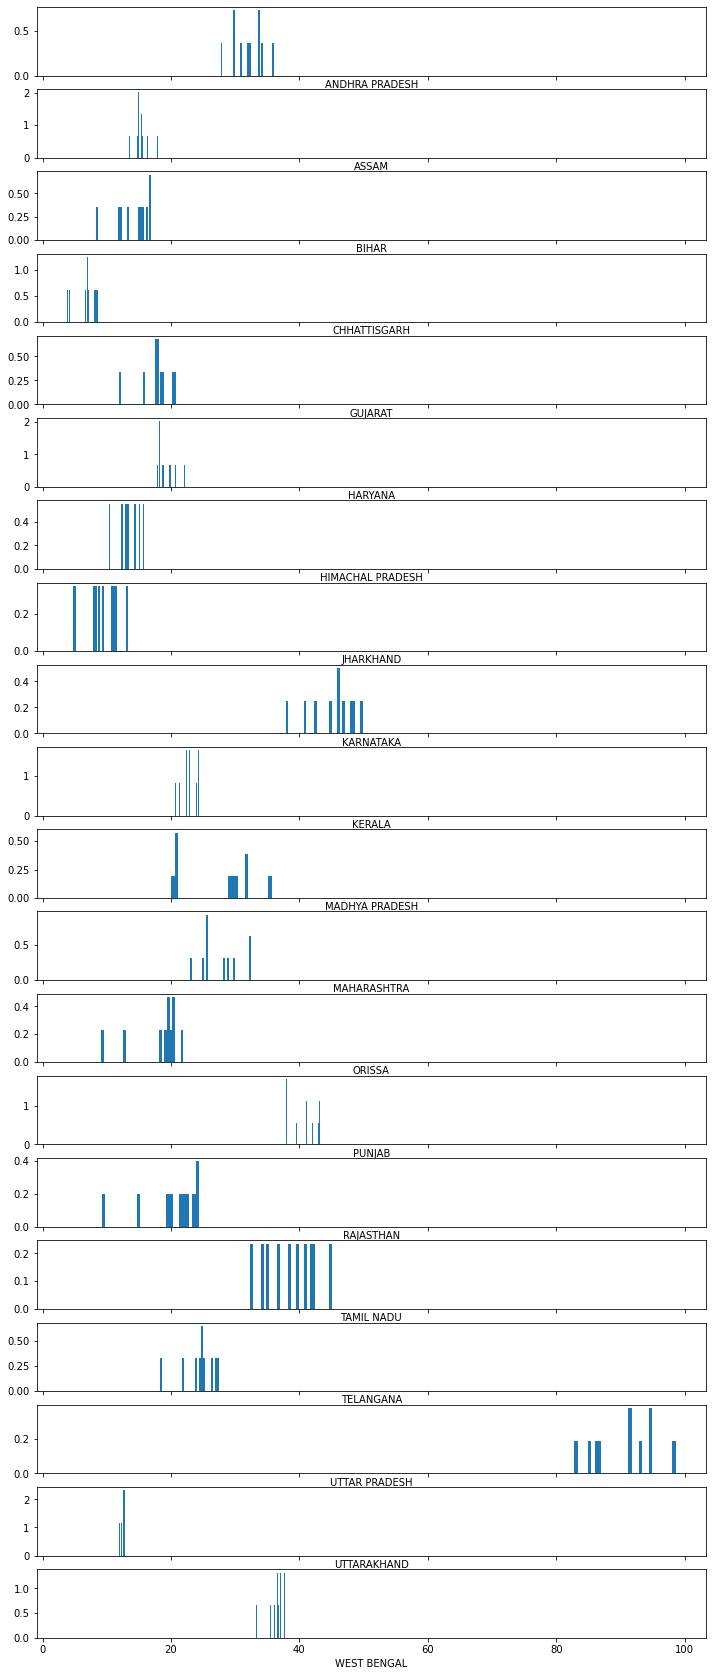

In [106]:
# set up fig, axes and pass the relevant arguments
fig, axes = plt.subplots(num_states,1,sharex=True, sharey=False, figsize=(12, 30))
#loop over each state
for i,s in enumerate(np.sort(states)):
    axes[i].hist(india_state.loc[india_state.State==s, 'rice'],bins=30, density=True)
    axes[i].set_xlabel(f"{s.upper()}")

plt.show()

## Nicer plot
- For better looking plots you can use Seaborn
- Seaborn is built on top of Matplotlib which means you can do with it anything Matplotlib can do and more
- Let's plot the kernel density of rice for the entire dataset
- Kernel density is a way to plot your data in a continous-looking way

In [107]:
df.head()

,statename,distname,statecode,distcode,year,yield_maize,yield_pearlmillet,yield_rice,yield_sorghum,yield_wheat,price_maize,price_pearlmillet,price_rice,price_sorghum,price_wheat,area_maize,area_pearlmillet,area_rice,area_sorghum,area_wheat
0,Andhra Pradesh,Ananthapur,1,52,1995,3.500000,0.750000,2.170732,0.750000,NaN,NaN,4253.0,6831.8184,NaN,NaN,2.00,4.00,41.00,32.000000,0.00
1,Andhra Pradesh,Ananthapur,1,52,1996,4.333333,0.666667,2.470588,0.810811,NaN,3930.0,4843.0,6866.6665,4749.0,NaN,3.00,3.00,68.00,37.000000,0.00
2,Andhra Pradesh,Ananthapur,1,52,1997,1.750000,1.000000,2.074074,0.724138,NaN,4046.0,4913.0,7325.7580,4920.0,NaN,4.00,1.00,54.00,29.000000,0.00
3,Andhra Pradesh,Ananthapur,1,52,1998,3.000000,0.666667,2.476923,1.473684,NaN,4380.0,7500.0,NaN,5240.0,4620.0,3.00,3.00,65.00,19.000000,0.00
4,Andhra Pradesh,Ananthapur,1,52,1999,3.081365,0.543353,2.587983,1.384427,0.659091,4547.0,5250.0,9318.1820,6905.0,5330.0,3.81,1.73,58.25,32.619999,0.44


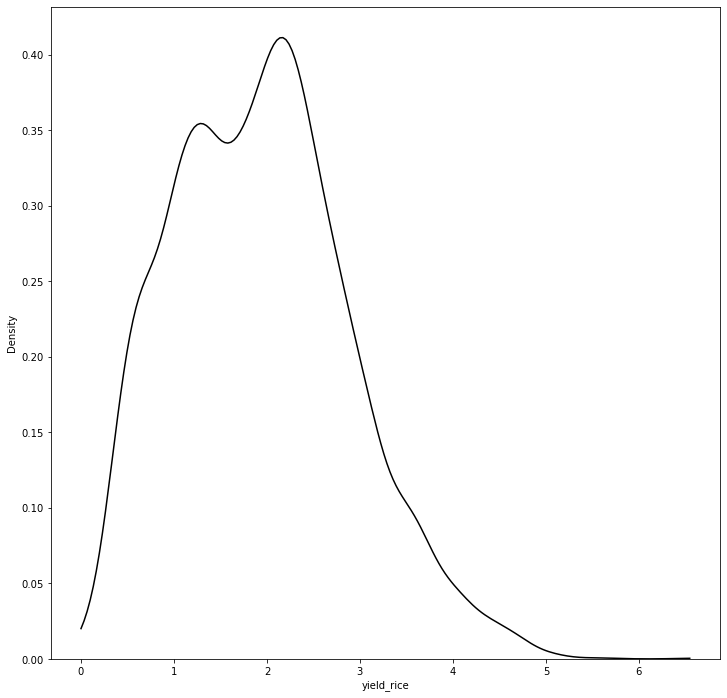

In [108]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))

ax=sns.kdeplot(data=df["yield_rice"], cut=0, color="k")
plt.show()

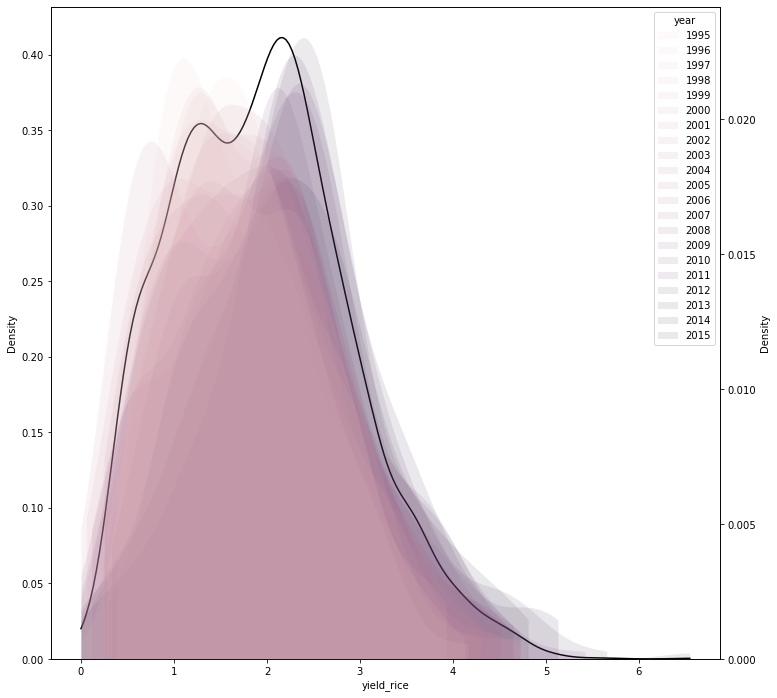

In [109]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
# plot the kdensity for all years and set the color to black
ax=sns.kdeplot(data=df["yield_rice"], cut=0, color="k", legend=True)

# add a kdensity for each year
ax2=ax.twinx()
sns.kdeplot(data=df, x='yield_rice',hue='year', cut=0, fill=True,alpha=.1,linewidth=0, legend=True, ax=ax2)

plt.show()